<a href="https://colab.research.google.com/github/JayMalde/Deep-Learning/blob/master/Exercise_5_ANN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



 # **ANN Regression**



In [1]:
import tensorflow as tf

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# **Preparing Dataset**

In [4]:
#Prepare The Dataset
# y = cos( 2*x1 ) + cos( 3*x2 )
N = 1000
# It will uniformly distribute between 3 and -3
X = np.random.random((N, 2)) * 6 -3
Y = np.cos(2 * X[:,0]) + np.cos(3 * X[:,1])

# **Scatter Points In The Form Of Cosine Functions**

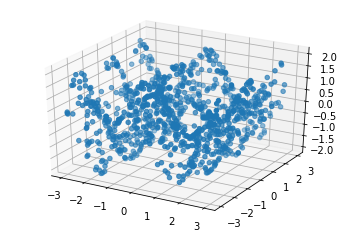

In [5]:
# Create The 3D Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

# **Building and Training Model**

In [6]:
# Build The Model 
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape = (2,), activation = 'relu'),
    tf.keras.layers.Dense(1)
])

In [15]:
# Compile And Fit Model
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss = 'mse')
r = model.fit(X, Y, epochs=100) 

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0842
Epoch 2/100
32/32 [==============================] - 0s 832us/step - loss: 0.0071
Epoch 3/100
32/32 [==============================] - 0s 838us/step - loss: 0.0037
Epoch 4/100
32/32 [==============================] - 0s 878us/step - loss: 0.0029
Epoch 5/100
32/32 [==============================] - 0s 896us/step - loss: 0.0026
Epoch 6/100
32/32 [==============================] - 0s 846us/step - loss: 0.0031
Epoch 7/100
32/32 [==============================] - 0s 800us/step - loss: 0.0032
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0060
Epoch 9/100
32/32 [==============================] - 0s 836us/step - loss: 0.0060
Epoch 10/100
32/32 [==============================] - 0s 856us/step - loss: 0.0069
Epoch 11/100
32/32 [==============================] - 0s 904us/step - loss: 0.0051
Epoch 12/100
32/32 [==============================] - 0s 848us/step - loss: 0.0188
Epoch 13/100
32/3

# **Plotting Loss**

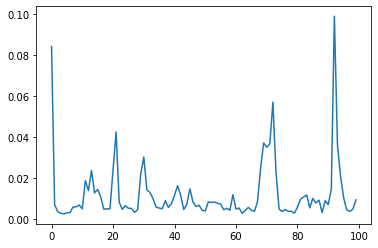

In [16]:
plt.plot(r.history['loss'], label = 'loss')

# **Plotting Output**

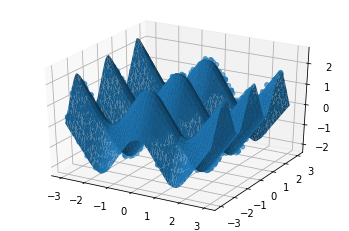

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat,linewidth=0.3)
plt.show()